This notebook discusses NRLEE nucleosynthesis via Jupyter technology.  As you read through the text, you can execute the code blocks.  You can change input (for example, choose different axis ranges or scaling or select different species to show in the plots).  You can right-click or control-click on figures to save them.  If your current version gets corrupted, don't worry.  Simply quit and download a new copy from GitHub, or start up a new version on Google Colab.

This notebook focuses on the pre-explosion nucleosynthesis.

## Table of Contents:

[Introduction](#introduction)<br/>
[Preliminaries](#preliminaries)<br/>
[Model](#model)<br/>
[Pre-explosion nucleosynthesis](#pre-explosion)<br/>

<a id='introduction'></a>
# Introduction


Here is the anatomy of a NRLEE:
    
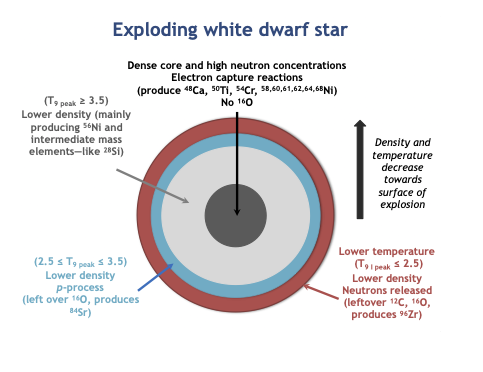

TODO:  obviously more text setting up the idea.

<a id='preliminaries'></a>
# Preliminaries

This notebook explores NRLEE nucleosynthesis via output from a series of single-zone network calculations. We first need to perform some preliminary operations to set up the notebook.

<a id='General'></a>
## General

Here we import packages and download data.  First, import the necessary packages and download the necessary data.  Installing wnutils will automatically also install numpy and matplotlib.

In [1]:
import sys
!{sys.executable} -m pip install --quiet wnutils

The next step is to import the packages to check for and retrieve the data:

In [2]:
import os, io, requests
from lxml import etree

This notebook uses [wnutils](https://wnutils.readthedocs.io) to analyze the nucleosyntheis [XML](https://www.w3.org/TR/REC-xml/) output, so the next code block imports that package.  It also imports the matplotlib and numpy packages.

In [3]:
import wnutils.xml as wx
import wnutils.multi_xml as mx
import matplotlib.pyplot as plt
import numpy as np

<a id='model'></a>
# Model

In this section, you choose the model for study.  This cell prints out the names of the available models.

In [4]:
models_xml = etree.parse(io.BytesIO(requests.get('https://osf.io/f4n7c/download').content))

models = (models_xml.getroot()).xpath("model")

for m in models:
    print((m.xpath("//name"))[0].text, ":", (m.xpath("//short_desc"))[0].text)

model1 : Peak temperature T9=14 at initial density 1.e10 g/cc.


Choose the model.  Save the url to a file and print out a description of the model.

In [5]:
model = 'model1'

xpath_str = "model[name = " + "'{}'".format(model) + "]"
desc = (((models_xml.getroot()).xpath(xpath_str))[0].xpath("//long_desc"))[0].text
print(desc)

f = open('url.txt', "w")
f.write((((models_xml.getroot()).xpath(xpath_str))[0].xpath("//url"))[0].text)
f.close()

First model.


The following code block next checks whether the data for the model exist locally, and, if not, retrieves and unpacks them from [OSF](https://osf.io/r6yax/).  If you would like to suppress the download statistics, add a *-s* to the curl command after the *-L*.

In [6]:
if not os.path.exists(model):
    !curl -o model.tar.gz -J -L `cat url.txt`
    !tar zxf model.tar.gz

<a id='pre-explosion'></a>
# Pre-explosion nucleosynthesis

With the data now downloaded, it is now possible to explore the nucleosynthesis before the explosion.

## Hydrogen burning

The first nucleosynthesis stage in the star's life was hydrogen burning.  This was modeled at constant temperature and density with initial solar composition, as given by [Lodders](https://ui.adsabs.harvard.edu/abs/2003ApJ...591.1220L/abstract).  Read in the data.

In [7]:
h = wx.Xml(model + '/pre_expl/h_burn/out.xml')

The conditions are printed in the next cell.

In [8]:
props = h.get_properties_as_floats(['time', 't9', 'rho'])
print('For the calculation, the duration, temperature, and density were:')
print('   time (Gyr) = {0:.2e}'.format(props['time'][len(props['time'])-1] / 3.15e17))
print('   T (K) = {:.2e}'.format(props['t9'][len(props['t9'])-1] * 1.e9))
print('   mass density (g/cc) = {:.2e}'.format(props['rho'][len(props['rho'])-1]))

For the calculation, the duration, temperature, and density were:
   time (Gyr) = 3.00e+00
   T (K) = 2.00e+07
   mass density (g/cc) = 2.00e+01


In hydrogen burning, the initial $^1$H burns to $^4$He.  For stars greater than about 1.3 times the mass of the Sun, this occurs via [CNO cycling](https://en.wikipedia.org/wiki/CNO_cycle).  Note that the mass fraction of a species is the fraction of the total mass of the system that is in that species.  It is thus the grams of that species per gram of material.  Core hydrogen burning occurs largely non-convectively in stars that leave behind white dwarf remnants.  Typically about 10% of the star (by mass) undergoes core hydrogen burning.

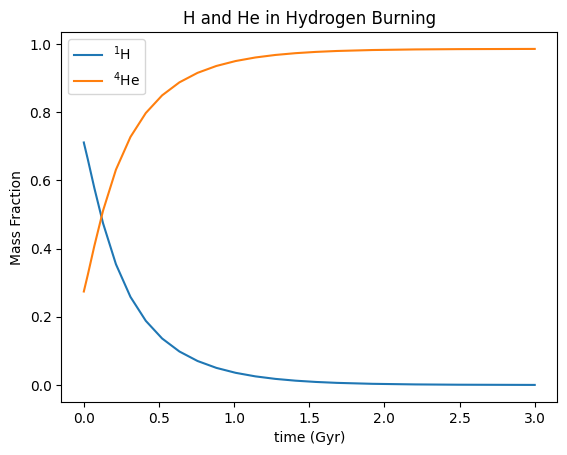

In [9]:
species = ['h1', 'he4']
h.plot_mass_fractions_vs_property('time', species, xfactor = 3.15e17, xlabel='time (Gyr)',
                                  use_latex_names = True, title='H and He in Hydrogen Burning')

## Helium burning

Once the star exhausts its core hydrogen, it contracts and heats up.  Shell hydrogen burning ignites in the hydrogen-rich layers outside the hydrogen exhausted core.  This burning adds to the size of the helium-rich core.  Evenutally, helium burning ignites in the core.  For the present calculation, this burning stage was again modeled with constant temperature and density.  Read in the data.

In [10]:
he = wx.Xml(model + '/pre_expl/he_burn/out.xml')

Now print out the conditions for the calculation.

In [11]:
props = he.get_properties_as_floats(['time', 't9', 'rho'])
print('For the calculation, the duration, temperature, and density were:')
print('   time (yr) = {0:.2e}'.format(props['time'][len(props['time'])-1] / 3.15e7))
print('   T (K) = {:.2e}'.format(props['t9'][len(props['t9'])-1] * 1.e9))
print('   mass density (g/cc) = {:.2e}'.format(props['rho'][len(props['rho'])-1]))

For the calculation, the duration, temperature, and density were:
   time (yr) = 1.00e+05
   T (K) = 2.00e+08
   mass density (g/cc) = 1.00e+03


Helium burning occurs via the [triple-alpha process](https://en.wikipedia.org/wiki/Triple-alpha_process).  It creates $^{12}$C and $^{16}$O from the initial $^4$He.

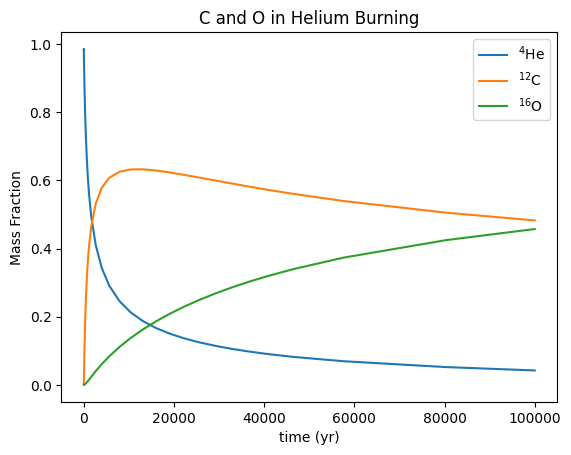

In [12]:
species = ['he4', 'c12', 'o16']
he.plot_mass_fractions_vs_property('time', species, xfactor = 3.15e7, xlabel='time (yr)',
                                   use_latex_names = True, title = 'C and O in Helium Burning')

Helium burning creates a carbon/oxygen core in the star.  If the core becomes [degenerate](https://en.wikipedia.org/wiki/Degenerate_matter#Degenerate_gases) at this stage, it is able to sustain itself against further gravitational contraction without further nuclear burning.  The reason is that radiation loss normally leads to a loss of energy from the core, which means the pressure decreases.  Nuclear burning releases energy and maintains the necessary pressure.  For degenerate matter, however, the pressure is simply maintained by the fact that no two electrons can exist in the same quantum mechanical state (the [Pauli exclusion principle](https://en.wikipedia.org/wiki/Pauli_exclusion_principle)).  At high density, this fact allows there to be strong pressure even at low temperature.



## S process

Outside the carbon/oxygen core, helium-rich matter exists and can undergo helium burning.  The ashes of this burning ($^{12}$C and $^{16}$O) settle onto the core and increase the core's mass.  The burning is in fact a complicated and alternating interplay of shell helium burning and shell hydrogen burning outside the helium burning, with mixing occurring between the various shell burnings.  This is the burning that occurs during the star's life on the [asymptotic giant branch](https://en.wikipedia.org/wiki/Asymptotic_giant_branch) (AGB).  During this phase, [s-processing](https://en.wikipedia.org/wiki/S-process) can occur.

Read in the data.

In [13]:
sproc = wx.Xml(model + '/pre_expl/s-process/out.xml')
exp_tau = wx.Xml(model + '/pre_expl/s-process/exp_tau.xml')

The present calculation modeled s-process nucleosynthesis by running the ashes of helium burning at constant temperature, density, and neutron density, which are printed in the next cell.

In [14]:
props = sproc.get_properties_as_floats(['time','t9', 'rho'])
x_n = sproc.get_mass_fractions(['n'])['n']
n_n = x_n[len(x_n)-1] * props['rho'][len(props['rho'])-1] * 6.022e23
print('For the calculation, the duration, temperature, mass density, and neutron density were:')
print('   time (yr) = {0:.2e}'.format(props['time'][len(props['time'])-1] / 3.15e7))
print('   T (K) = {:.2e}'.format(props['t9'][len(props['t9'])-1] * 1.e9))
print('   mass density (g/cc) = {:.2e}'.format(props['rho'][len(props['rho'])-1]))
print('   neutron density (per cc) = {:.2e}'.format(n_n))

For the calculation, the duration, temperature, mass density, and neutron density were:
   time (yr) = 1.00e+05
   T (K) = 2.50e+08
   mass density (g/cc) = 1.00e+03
   neutron density (per cc) = 1.00e+08


A convenient parameter for discussion of the evolution of the neutron captures is the neutron exposure $\\tau$.  It is mathematically defined as $\tau(t) = \int_0^t n_n(t') v_T(t') dt'$, where $n_n(t)$ is the neutron density (number of neutrons per cubic centimeter) at time $t$ and $v_T(t)$ is the thermal velocity of the neutrons at time $t$.  Physically, the exposure is the total number of neutrons that pass through an area in duration from time 0 to $t$.  For s-process studies, it is convenient to use the units inverse millibarns, where a millibarn, 1/1000 of a [barn](https://en.wikipedia.org/wiki/Nuclear_cross_section), has units $10^{-27}$ cm$^2$.  The following code block shows the evolution of the neutron exposure in the calculation as a function of time.  Since the neutron density and temperature were held constant in the calculation, the exposure rises linearly with the time.

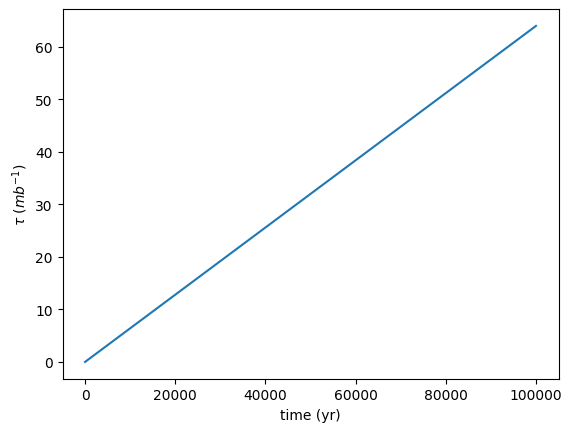

In [15]:
sproc.plot_property_vs_property('time', ('exposure','n'), xfactor = 3.15e7, xlabel='time (yr)',
                                ylabel='$\\tau\ (mb^{-1})$')

The ensemble of nuclei undergoing s-process nucleosynthesis does not see a single neutron exposure but, because of the complicated interplay of hydrogen and helium shell burning in the AGB star, experiences rather a distribution $\rho(\tau)$ of such exposures.  Early [studies](https://ui.adsabs.harvard.edu/abs/1974ApJ...193..397C/abstract) used an exponential distribution of exposures such that $\rho(\tau) = \frac{1}{\tau_0} e^{-\tau/\tau_0}$, where $\tau_0$ is the mean exposure.  For such a distribution, most nuclei see little exposure and a smaller fraction of nuclei see larger exposures.  Those early studies found that an exponential distribution with $\tau_0 = 0.3\ mb^{-1}$ fits the solar s-process abundance distribution fairly well.  The current model uses such a distribution, and the next code block shows the abundance distribution that results when the abundances for the model are weighted by this distribution.

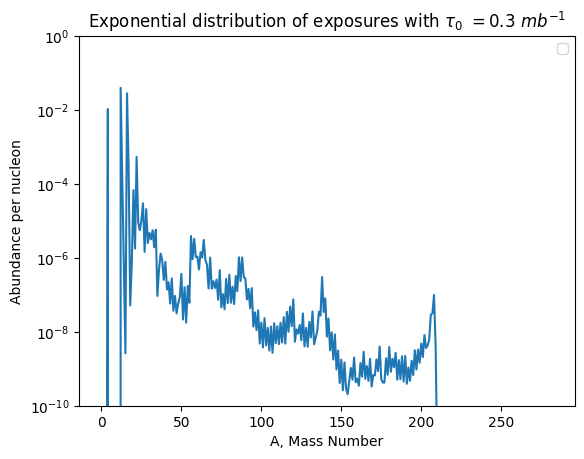

In [16]:
exp_tau.plot_abundances_vs_nucleon_number(ylim=[1.e-10,1], xlabel='A, Mass Number', ylabel='Abundance per nucleon',\
                                          yscale='log', title = 'Exponential distribution of exposures with $\\tau_0\ = 0.3\ mb^{-1}$',
                                          legend="")